(5206, 2311)
howbig 1111
y_st 0
y_len 924
count2 0
x_start [0]
x_length [2328]
y_start [0]
y_length [924]
start[p] 0
start[p]+find[p] 2328
splity[starty[py]] 1386
splity[starty[py]+findy[py]] 2310


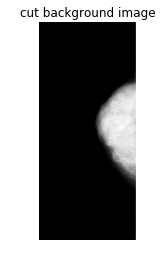

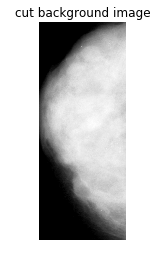

In [45]:
import csv
import os
import random
import sys
from datetime import datetime
import cv2
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import SimpleITK as sitk
from time import strftime
mass_training_file = "D:\\DDSM\\total_case_path_train_density.csv"
f = open(mass_training_file, 'r')
def rotate90(src):
        img_copy = src.copy()
        img_copy = cv2.transpose(img_copy)
        img_copy = cv2.flip(img_copy, 1)
        return img_copy
def flip(src):
        img_copy = src.copy()
        img_copy = cv2.flip(img_copy, 1)
        return img_copy    
def read_dcm_image(path):
        ds = sitk.ReadImage(path)
        img_array = sitk.GetArrayFromImage(ds)
        return img_array[0]

img = (read_dcm_image('D:/DDSM/DOI/Calc-Training_P_02460_RIGHT_CC/1.3.6.1.4.1.9590.100.1.2.374233324813387522409175382030038004307/1.3.6.1.4.1.9590.100.1.2.66312522611354018333991103283574837836/000000.dcm'))
    
print(img.shape)
splity=[]
splitx=[]
howbig= random.randint(1000,1500)
print('howbig',howbig)
for i in range(img.shape[1]):
    if( sum( img[:,i] )/img.shape[0]  >1000 ):
        splity.append(i)
#print(splity)
for i in range(img.shape[0]):
    if(sum( img[i,:] )/img.shape[1]  > 1000 ):
        splitx.append(i)
#print(splitx)
count=0
start=[]
find=[]
splitx.append(0)
for i in range(len(splitx)-1):
    if splitx[i+1]-splitx[i]==1:
        if count==0:
            start.append(i)
        count=count+1
    else:
        if count != 0:
            find.append(count)
            #print('x_len',count)
        count=0
p=find.index(max(find)) 

county=0
starty=[]
findy=[]
splity.append(0)
#print(splity)
for i in range(len(splity)-1):
    if splity[i+1]-splity[i]==1:
        if county==0:
            starty.append(i)
            print('y_st',i)
        county=county+1
        #print("count1",county)
    else:
        if county != 0:
            findy.append(county)
            print('y_len',county)
        county=0
        print("count2",county)

py=findy.index(max(findy)) 
print('x_start',start)
print('x_length',find)
print('y_start',starty)
print('y_length',findy)
print('start[p]',start[p])
print('start[p]+find[p]',start[p]+find[p])
print('splity[starty[py]]',splity[starty[py]])
print('splity[starty[py]+findy[py]]',splity[starty[py]+findy[py]])
cutimg=img[splitx[start[p]]:splitx[start[p]+find[p]],splity[starty[py]]:splity[starty[py]+findy[py]]]
plt.imshow(img ,cmap='gray')
plt.title('cut background image')
plt.axis('off')
plt.show()  
plt.imshow(cutimg ,cmap='gray')
plt.title('cut background image')
plt.axis('off')
plt.show()    

In [10]:
answer =[1,1,1,1,0]
predit =[1,1,1,1,0]

for i in range(len(answer)):
    if answer[i]==predit[i]:
        print('corrent',i)

corrent 0
corrent 1
corrent 2
corrent 3
corrent 4


# 